#  Implement Quantum Error Correction using QCNN

In this notebook, we introduce Quantum error correction code using QCNN
and 3 qubit encoder and decoder. We then implement these error correction using Qiskit and run on a simulator 

## Contents

1. [Introduction](#introduction)  
   1.1 [Quantum Convolution Neural Network](#Quantum-Convolution-Neural-Network )  
   1.2 [Architecture of error correction using QCNN](#Architecture-of-error-correction-using-QCNN)  
   
2. [Implement 3 qubit error correction](#implementation)  
   2.1 [Decoder & Encoder circuit](#)  
   2.2 [Noise Model](#fourier-transform-free-algorithm)    
   2.2 [complete circuit](#fourier-transform-free-algorithm)  
   2.2 [Optimization](#fourier-transform-free-algorithm)  
   
3. [Implement 9 qubit error correction](#implementation)

4. [Conclusion](#references)

5. [References](#references)

## 1. Introduction 

In the current noisy intermediate-scale quantum(NISQ) era, quantum processors are not advanced enough to be fault-tolerant. Quantum processor are highly sensitivte to the environment, so ultimate solution is to achieve the sufficient number and coherence time of qubit through error correction Therefore it is necessary to devise and utilize error correction technique

 Meanwhile, motivated by the success of classical convolution neural networks(CNN) , several algorithms to implement quantum convolution neural network have been proposed recently The Quantum Convolutional Neural Network, a quantum analog of classical convolution neural networks is a quantum machine learning ansatz that combines unitary convolution layers with pooling layers. [1]

Therefore, we focus on the error correction using qcnn structure in this notebook. and then we aim to implement by qiskit simulator 

## 1.1 Quantum Convolution Neural Network 

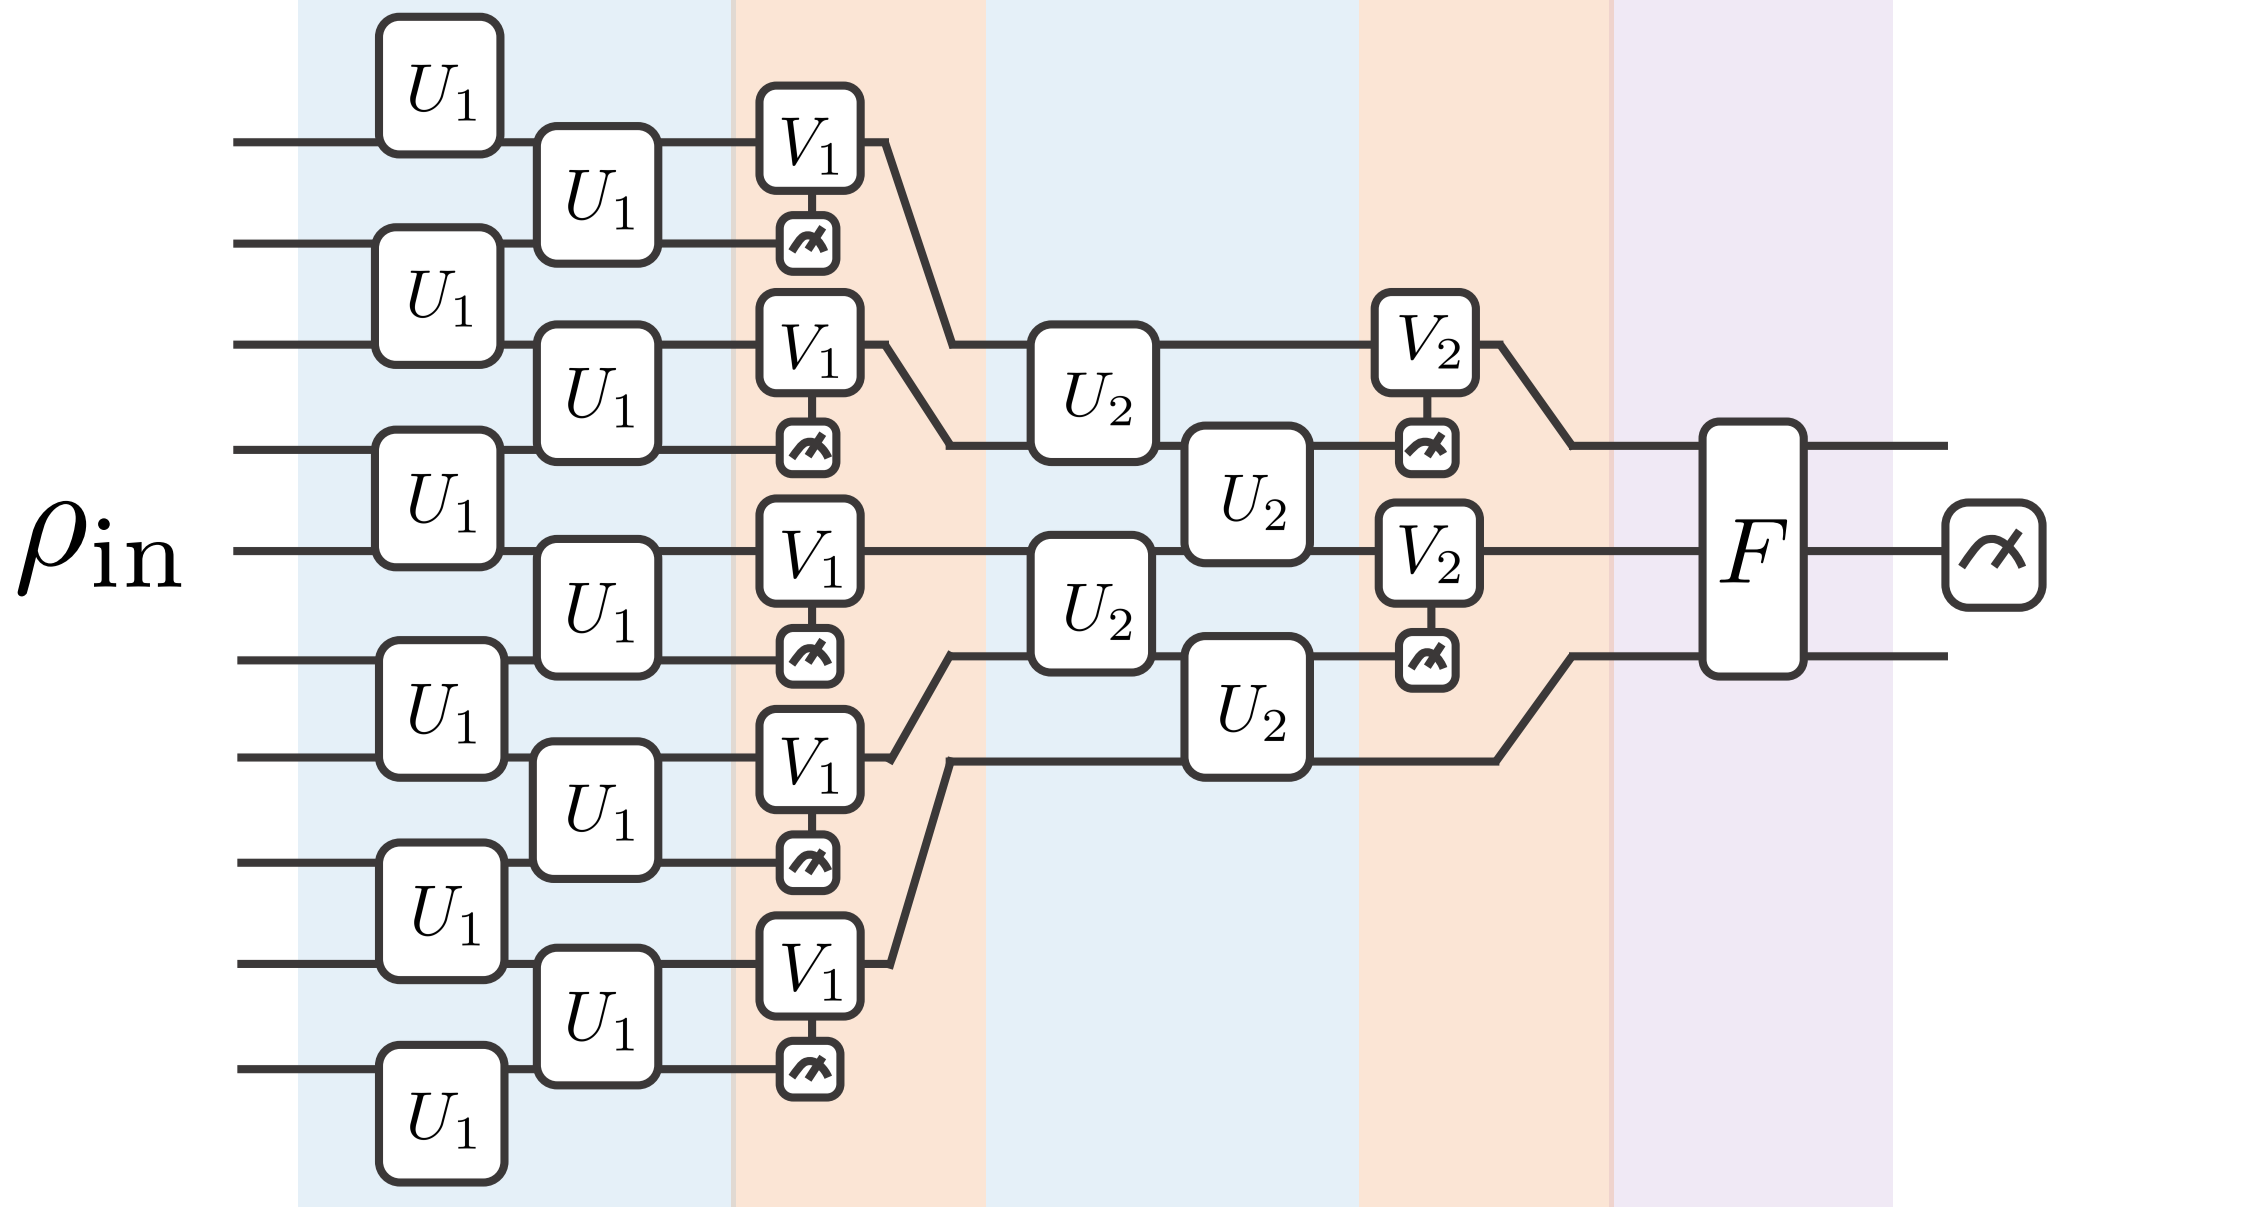

QCNN, or Quantum Convolutional Neural Network extends the key features and structures of existing CNN to quantum systems. When a quantum physics problem defined in the many-body Hilbert space is transferred to a classical computing environment, the data size grows exponentially in proportion to the system size, making it unsuitable for efficient solutions. Because data in a quantum environment can be expressed using qubits, the problem can be avoided by applying a CNN structure to a quantum computer.
As shown in the above architecture, the QCNN model applies the convolution layer and the pooling layer which are the key features of CNN, to the quantum systems.
1. The hidden state is discovered by applying multiple qubit gates beteween adjacent qubits in the convolution circuit 
2. The pooling Circuit reduces the quantum's systems size by oberving the qubit or applying C-NOT gates 
3. Repete the convolution and pooling layers from step1, 2
4. If the size of the system is small enogh, The classfication result is predicted 


## 1.2  Architecture of error correction using QCNN 

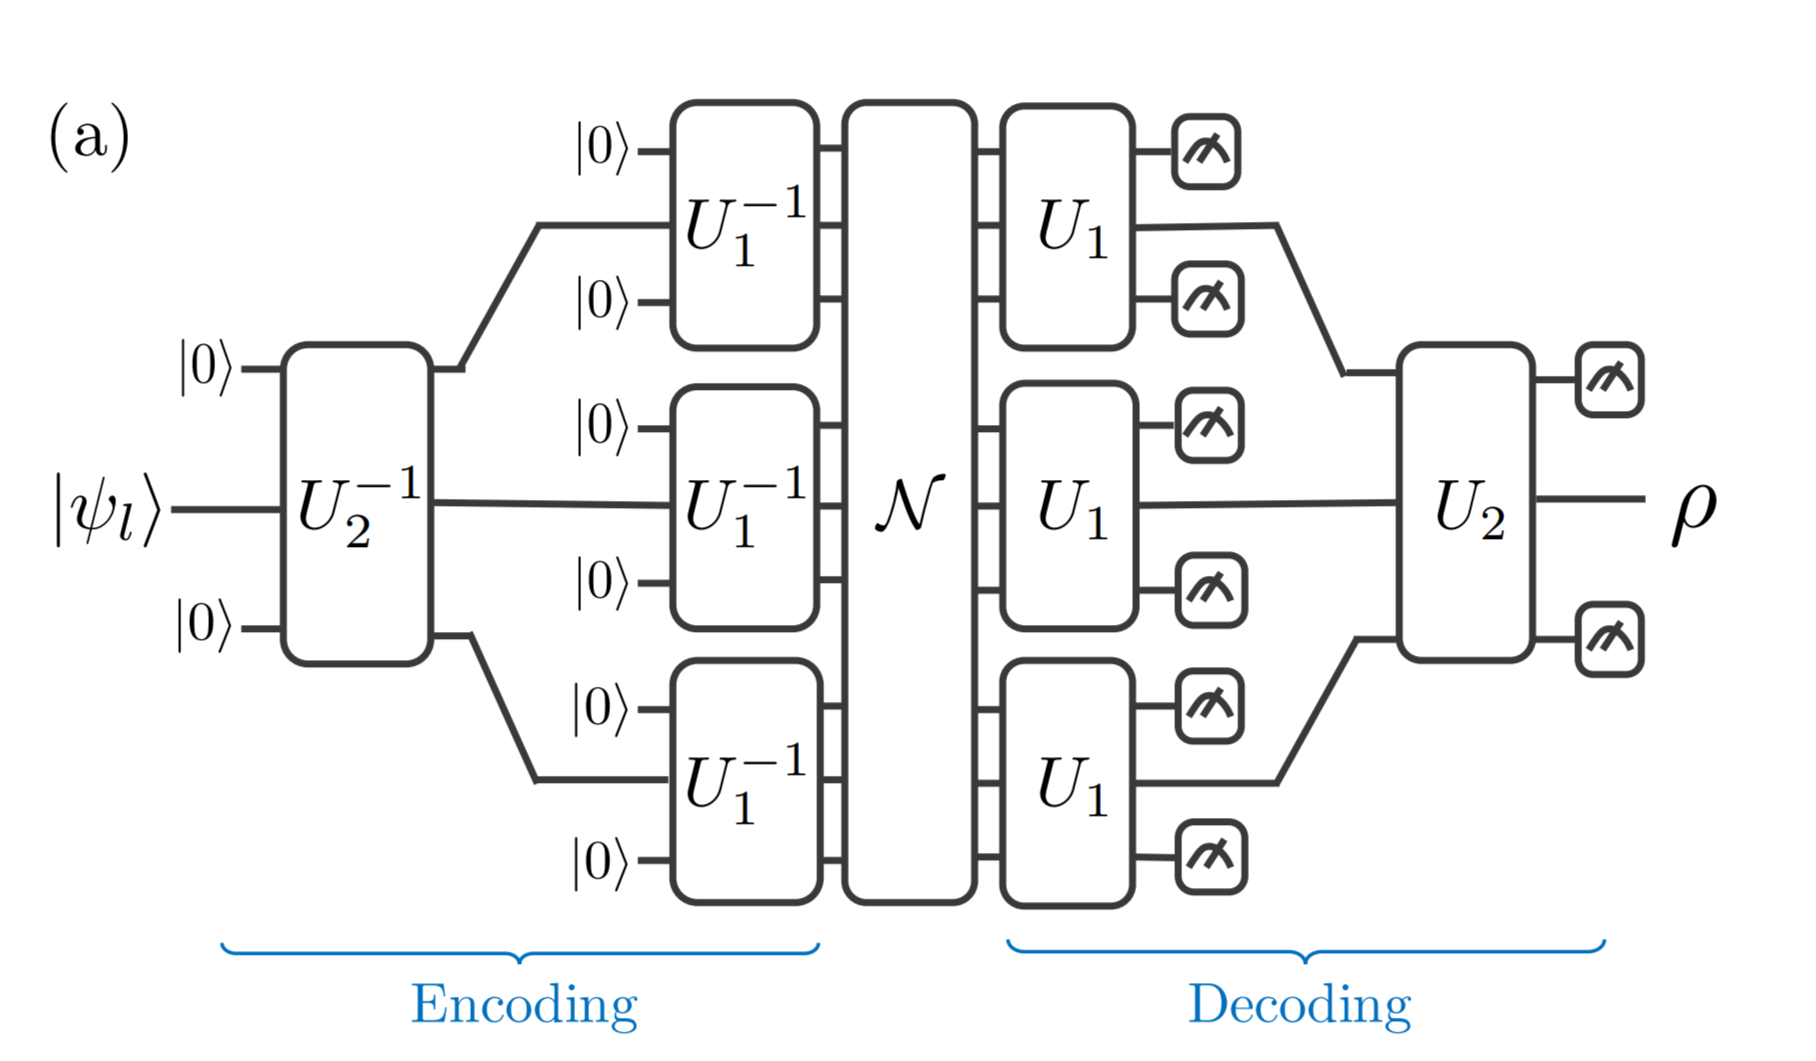

The inverse QCNN encodes a single logical qubit $ |\Psi _{l}> $ into 9 physical qubits, which undergo noise N . QCNN then decodes these to obtain the logical state ρ 

For error correction of 3-qubit bit-flip and phase-flip, our model circuit will obtain the encoder circuit, noise channel, and decoder circuit. In the encoder circuit,  the input state will be copied to the nearest wires by using controlled unitary gates. After that our input state and copied states will enter the convolutional layer.  In this layer qubits interact with another qubit locally

Coming through the encoder circuit qubits enter to the noise channel.
In noise channel our noise model causes bit-flip error ,phase-flip error  or bitflip-phase mixed error

Decoder reversing the quantum circuit. As all quantum circuit are unitary operations. $U^{\dagger}U = 1$ Thus, the decoder circuit will be a Inverse version of encoder circuit

## 2. Implement 3 qubit error correction

Using Qcnn, we are introduction quantum error correction code, For error correction of 3- quit bit-flip and phase-flip, our model circuit will obtain the encoder part, noise channel and decoder circuit

### 2.1 Decoder & Encoder Circuit

#### -One Qubit Unitary Circuit

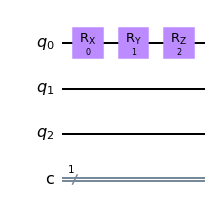

#### -Two Qubit Unitary Circuit

The structure of two qubit unitary circuit is built by adding One-qubit unitary gate, Rzz and Ryy gate

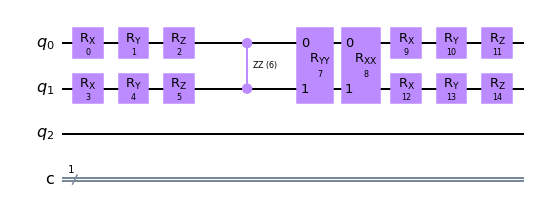

#### Decoder circuit

one- qubit unitary circuit and two qubit unitary circuit architecture 
by adding those two circuits to decoder circuit.

![89](\Users\OHINHYUK\Pictures\Screenshots\89.png)


#### Encoder circuit

Encoder circuit is the reverse of the decoder circuit 

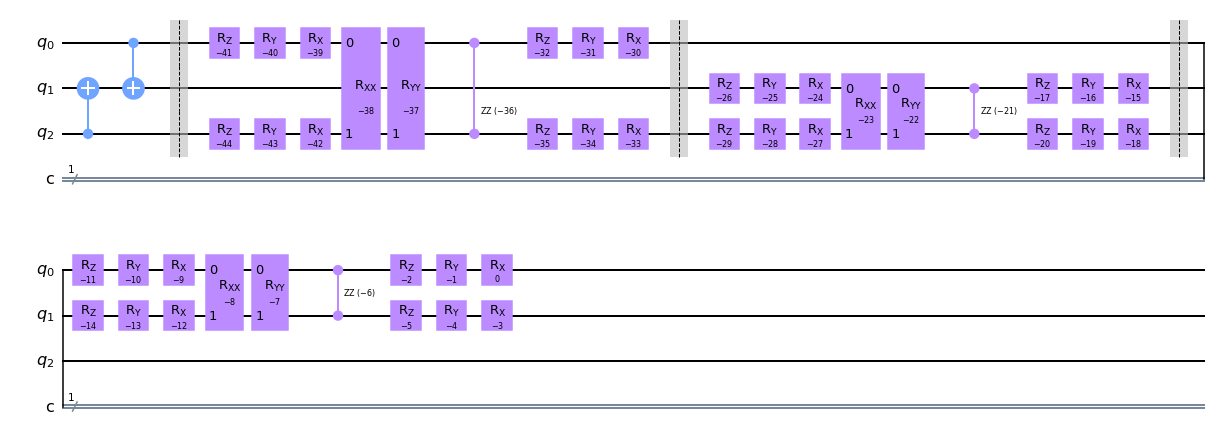

### 2.2  Noise Model 

In quantum computing noise is any unwanted transformation that corrupts the intended output of a quantum computation. 

The noise model is built based on the concept that our circuit can only correct the 1-bit flip error and 1-phase flip
The Bit flip are caused if one bit changes due to noise 
$$ X | 0> = | 1>$$
$$ X | 1> = | 0>$$
Analysing the effect of X gate can representative noise for bit flipping
The Phase flip is induced when as qubit faces change in their relative phase 
$$ Z | 0> =  - | 1>$$
$$ Z | +> = | ->$$
by the changes, we hane made Z gate as the foretates of noise for phase flipping
The bit flip error and phase flip error can cause simultaneously. This error can be implemented by adding X-gate and Z- gate


In [5]:
import random
from qiskit import QuantumCircuit
circ = QuantumCircuit(3,1)
x_p = 30
z_p= 30
xz_p = 30

circ = QuantumCircuit(3,1)
def random_circuit(n,circ,x_p,z_p,xz_p):
    circ = QuantumCircuit(3,1)
    p = x_p + z_p + xz_p
    print(f"bit flip(X) 확률:{x_p}%\nphase flip(Z) 확률:{z_p}%\nbit and phase flip(X-Z) 확률 :{xz_p}%,\nNon error(I):{100-p}%")
    
    a = random.choices(range(1, 5),weights=[x_p, z_p, xz_p,100-p ])
    if a ==[1]:
        circ.x(n)
    elif a ==[2]:
        circ.z(n)
    elif a ==[3]:
        circ.x(n)
        circ.z(n)
    elif a ==[4]:
        pass
    return circ
random_circuit(1,circ,x_p,z_p,xz_p).draw()

bit flip(X) 확률:30%
phase flip(Z) 확률:30%
bit and phase flip(X-Z) 확률 :30%,
Non error(I):10%


q_0: ──────────
     ┌───┐┌───┐
q_1: ┤ X ├┤ Z ├
     └───┘└───┘
q_2: ──────────
               
c: 1/══════════

### 2.3 Complete Circuit

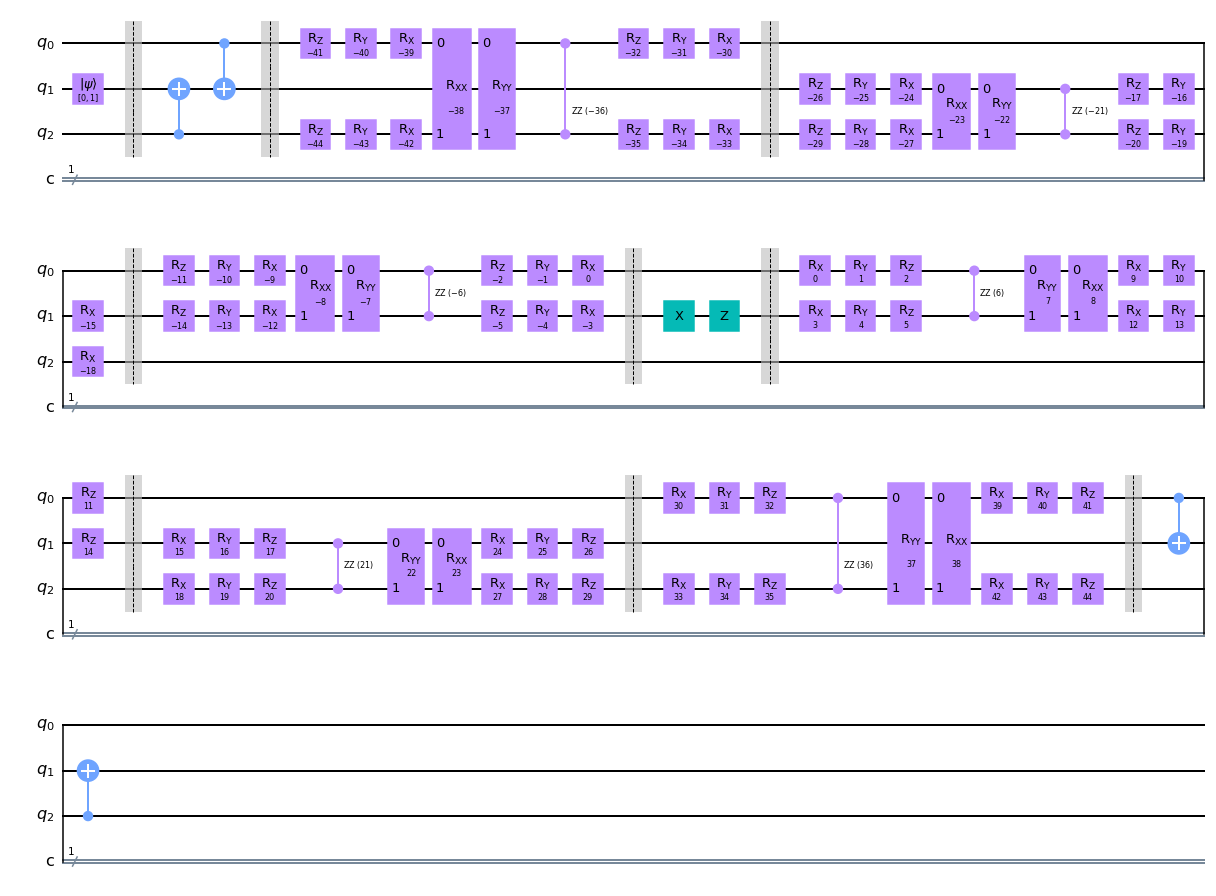

### 2.4 optimization

### 2.5 Error corrceting Result

## 3. Implement 9 qubit error correction

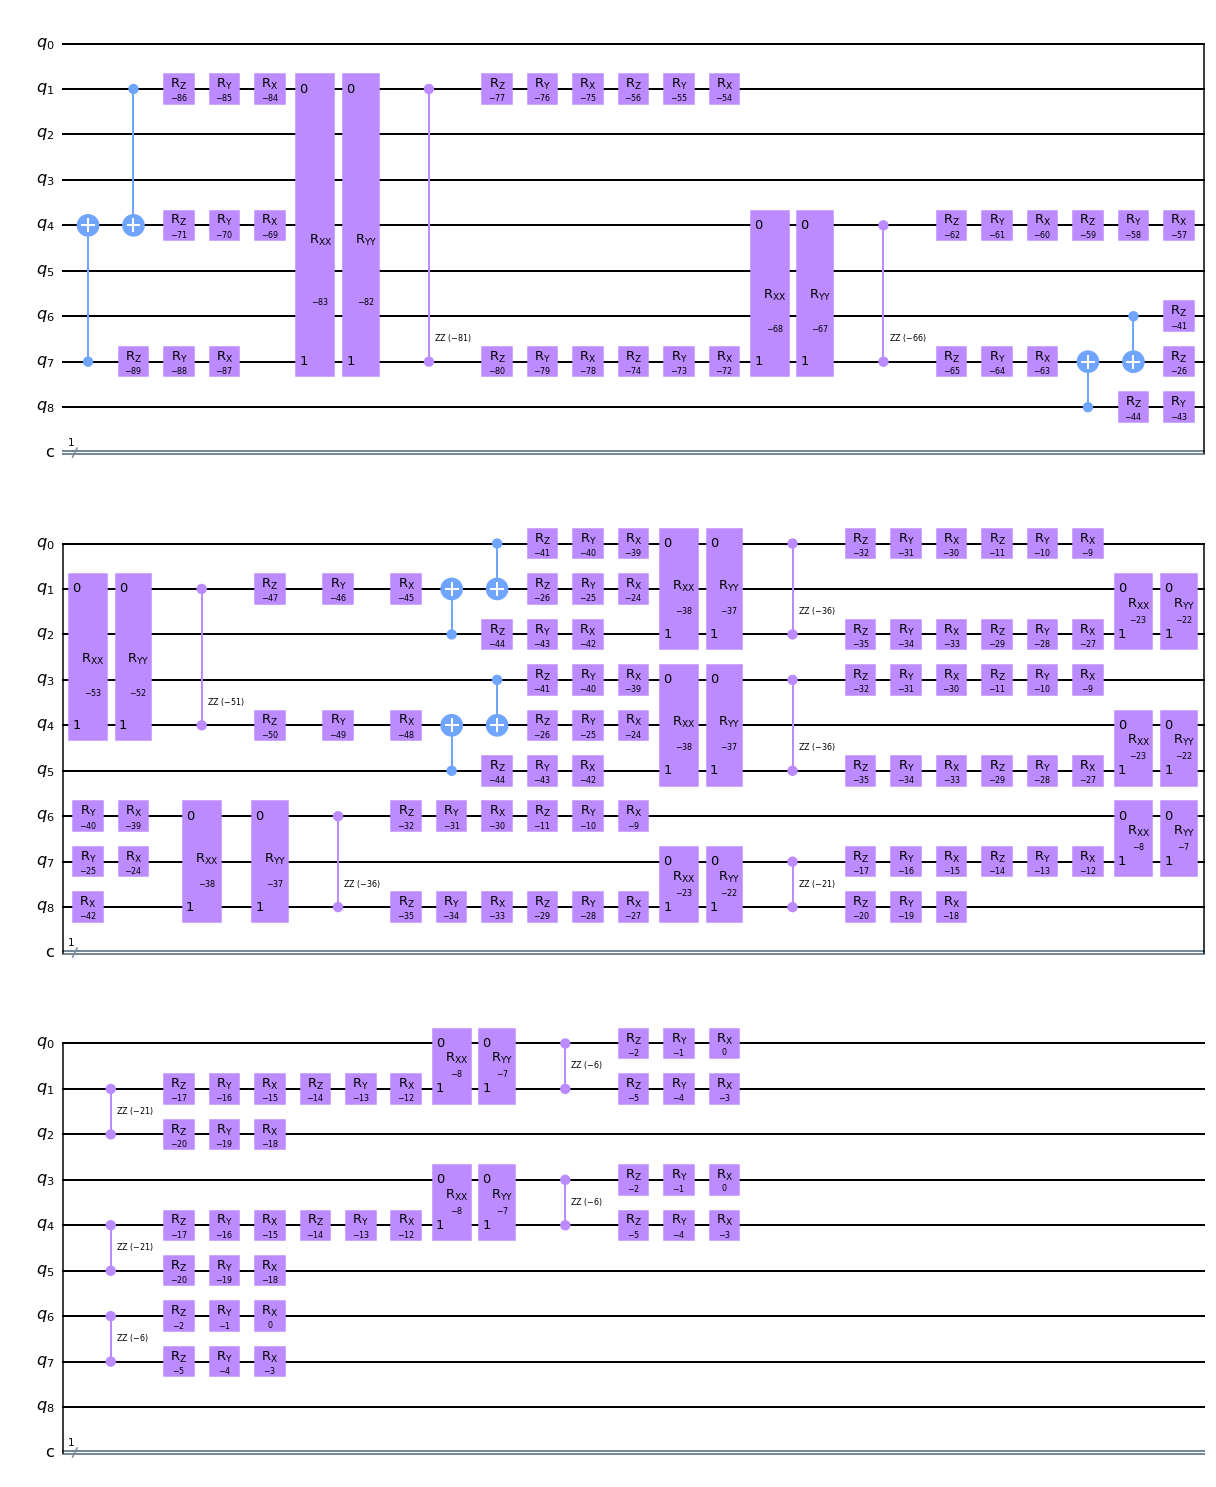

## 4. Conclsion

## 5. References

1,Iris Cong, Soonwon Choi, and Mikhail D. Lukin. Quantum convolutional neural networks. Nature Physics, 15(12):1273–1278, December 2019.
2.Ian MacCormack, Conor Delaney, Alexey Galda, Nidhi Aggarwal, and Prineha Narang. Branching Quan- tum Convolutional Neural Networks. arXiv:2012.14439 [physics, physics:quant-ph], December 2020. arXiv: 2012.14439.
3.Tak Hur, Leeseok Kim, and Daniel K. Park. Quantum convolutional neural network for classical data classification. Quantum Machine Intelligence, 4(1):3, 2022.